In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (6.4*2.5,4.8*3)
from dsp import util
import json

Fs = 150e6/8/256


In [21]:
def process_scan(file):
    indatafwd = None
    filenamefwd = f'log/linefwd{file}.json'
    filenamerev = f'log/linerev{file}.json'
    with open(filenamefwd, "r") as fp:
        indatafwd = json.load(fp)
    with open(filenamerev, "r") as fp:
        indatarev = json.load(fp)

    print("fs", Fs)
    Nfft = 8192
    Nwin = 14
    PIXEL_COUNT = 32
    LINE_COUNT = 10
    #fig, ax = plt.subplots(nrows=2, ncols=1, tight_layout=True)
    fwdimg = np.zeros((LINE_COUNT, PIXEL_COUNT*Nwin))
    fwdimgph = np.zeros((LINE_COUNT, PIXEL_COUNT*Nwin))
    revimg = np.zeros((LINE_COUNT, PIXEL_COUNT*Nwin))
    revimgph = np.zeros((LINE_COUNT, PIXEL_COUNT*Nwin))

    for linenumber, linedata in enumerate(indatafwd):
        if linenumber >= LINE_COUNT:
            break
        for pixel, windows in linedata.items():
            if len(windows) < Nwin:
                print(pixel, linenumber,len(windows))
                continue
            maxs = []
            args = []
            pixel = int(pixel)
            for window in windows:
                window_zm = np.array(window) - np.mean(window)
                ffted = np.fft.rfft(window_zm, Nfft, norm='ortho')
                amp = np.abs(ffted)
                mag = 20 * np.log10(amp)
                args.append(np.argmax(mag))
                maxs.append(np.max(mag))
            fwdimg[linenumber, pixel*Nwin:pixel*Nwin+Nwin] = maxs[:Nwin]
            fwdimgph[linenumber, pixel*Nwin:pixel*Nwin+Nwin] = args[:Nwin]

    fwdimg[0, :Nwin] = fwdimg[1, :Nwin]
    fwdimgph[0, :Nwin] = fwdimgph[1, :Nwin]

    plt.figure()
    plt.title('Forward Scan Amplitude')
    plt.imshow(fwdimg, cmap='Greys', aspect=Nwin)

    plt.figure()
    plt.title('Reverse Scan Phase')
    plt.imshow(fwdimgph, cmap='Greys', aspect=Nwin)

    Nwin = 14
    for linenumber, linedata in enumerate(indatarev):
        if linenumber >= LINE_COUNT:
            break
        for pixel, windows in linedata.items():
            if len(windows) < Nwin:
                print(pixel, linenumber, len(windows))
                continue
            maxs = []
            args = []
            pixel = int(pixel) - 32
            for window in windows:
                window_zm = np.array(window) - np.mean(window)
                ffted = np.fft.rfft(window_zm, Nfft, norm='ortho')
                amp = np.abs(ffted)
                mag = 20 * np.log10(amp)
                args.append(np.argmax(mag))
                maxs.append(np.max(mag))
            revimg[linenumber, pixel*Nwin:pixel*Nwin+Nwin] = maxs[:Nwin]
            revimgph[linenumber, pixel*Nwin:pixel*Nwin+Nwin] = args[:Nwin]

    plt.figure()
    plt.title('Reverse Scan Amplitude')
    plt.imshow(revimg, cmap='Greys', aspect=Nwin)

    plt.figure()
    plt.title('Reverse Scan Phase')
    plt.imshow(revimgph, cmap='Greys', aspect=Nwin)

388
fs 73242.1875
0 0 8


C:\Users\mahdi\AppData\Local\Temp/ipykernel_14712/566327349.py:41: RuntimeWarning: divide by zero encountered in log10
  mag = 20 * np.log10(amp)
C:\Users\mahdi\AppData\Local\Temp/ipykernel_14712/566327349.py:73: RuntimeWarning: divide by zero encountered in log10
  mag = 20 * np.log10(amp)


495
fs 73242.1875
0 0 12


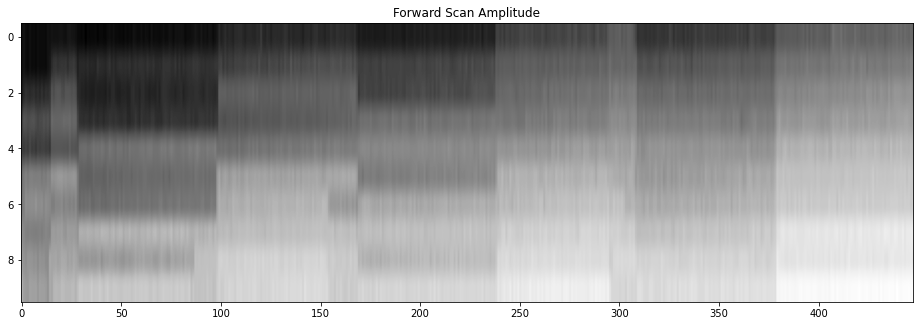

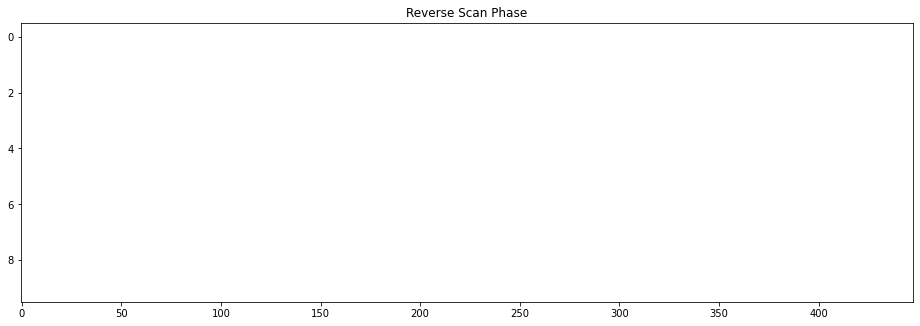

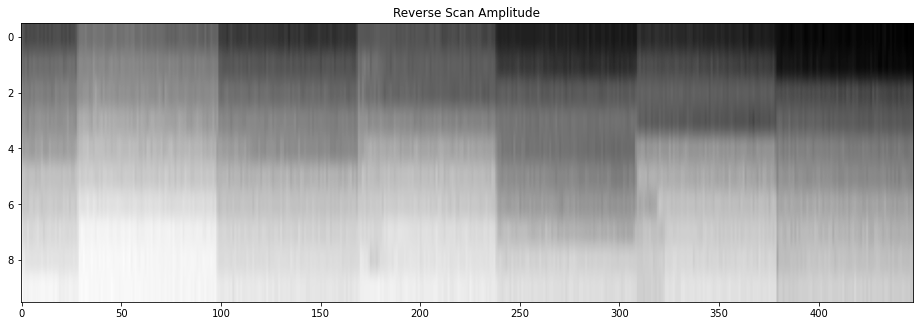

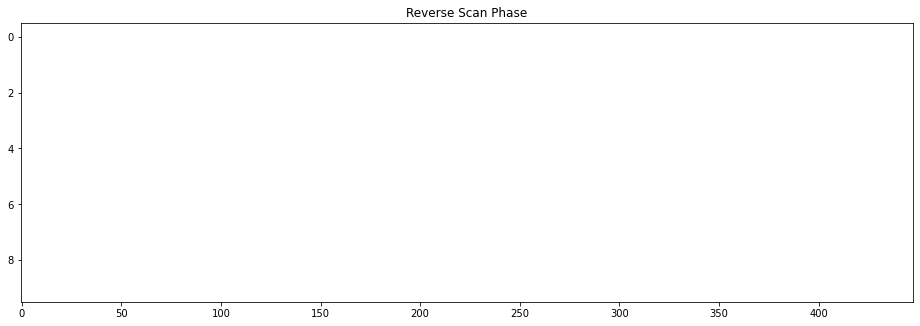

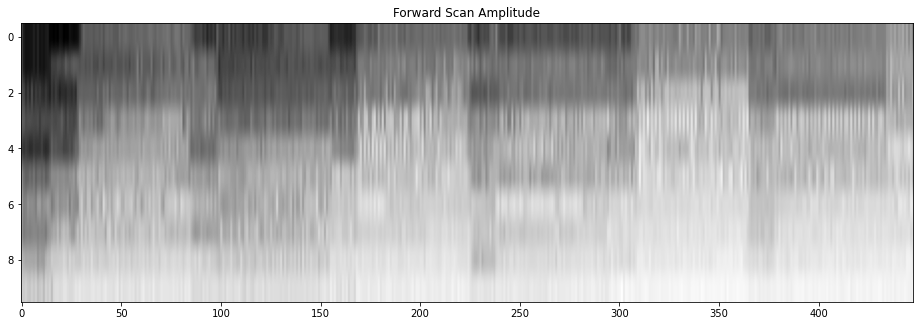

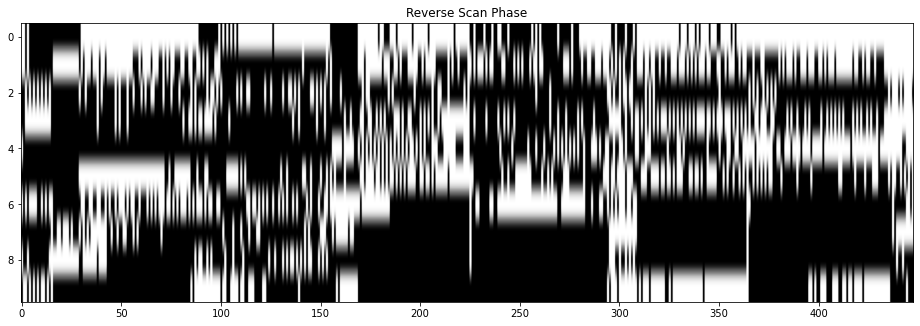

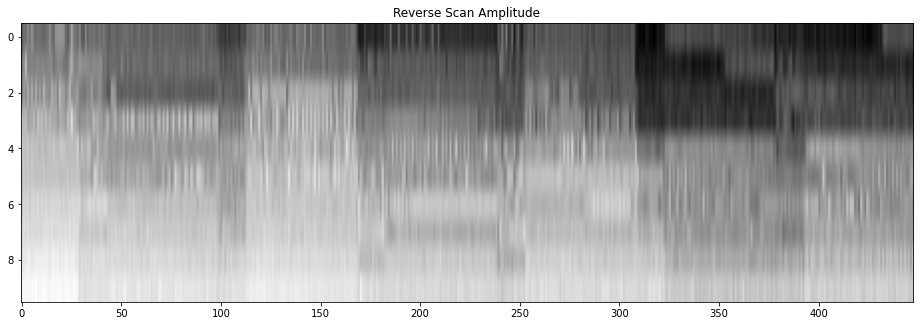

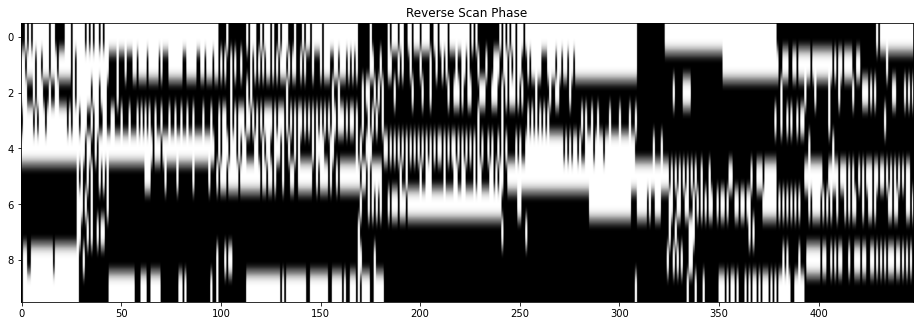

In [22]:

#scans = ['s1', 's2', 's3', 's4', 'f1']
#scans = ['054', '085']
scans = ['388', '495']

for scan in scans:
	print(scan)
	process_scan(scan)

plt.show()